In [1]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9dd84cf97c4fc16956f39829c81f3b6907c8fc83-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9dd84cf97c4fc16956f39829c81f3b6907c8fc83-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [3]:
# q0 = [1., 0., 0., 0., 0., 0., 0.005]
q0 = [1., 0., 0., 0., 0., 0., 0.]
v0 = [0., 0., 0., 0.1, 0. , 0.]
N = 5

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] = 0.

(::#1) (generic function with 1 method)

In [4]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=true);

19-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.1
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47086    
 -8.79433e-10
 -8.57413    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47086    
 -8.79433e-10
 -8.57413    

Implicit Contacts


19-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.1
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47086    
 -8.79433e-10
 -8.57413    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47086    
 -8.79433e-10
 -8.57413    

elapsed time: 257.873083536 seconds


19-element Array{Float64,1}:
  1.0        
  1.17246e-19
 -1.09594e-12
  9.5872e-21 
  0.000326895
  4.24704e-11
  0.000162462
  4.68984e-17
 -4.38375e-10
  3.83488e-18
  0.0653789  
  8.49407e-9 
  0.0324925  
 -9.37969e-15
  8.76751e-8 
 -7.66976e-16
  0.000484392
  3.15625e-10
  0.000137929

6-element Array{Float64,1}:
   0.0        
   0.0        
  -1.03398e-25
   7.34205    
  -8.40172e-7 
 -16.0994     

6-element Array{Float64,1}:
   0.0        
   0.0        
  -1.03398e-25
   7.34205    
  -8.40172e-7 
 -16.0994     

elapsed time: 0.740591462 seconds

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



19-element Array{Float64,1}:
  1.0        
 -9.58813e-19
  6.71239e-14
  6.05105e-19
  0.000278837
  3.46516e-10
  0.000207379
 -3.83525e-16
  2.68496e-11
  2.42042e-16
  0.0557673  
  6.93032e-8 
  0.0414759  
  7.67051e-14
 -5.36991e-9 
 -4.84084e-14
  7.15597e-5 
  5.46809e-10
 -0.000251057

6-element Array{Float64,1}:
   0.0        
   0.0        
  -8.27181e-25
   8.90415    
  -8.32923e-6 
 -18.076      

6-element Array{Float64,1}:
   0.0        
   0.0        
  -8.27181e-25
   8.90415    
  -8.32923e-6 
 -18.076      

elapsed time: 0.748681508 seconds


19-element Array{Float64,1}:
  1.0        
  2.03309e-15
  4.78014e-11
 -4.88648e-16
  0.000378355
  5.57013e-10
  2.06389e-6 
  8.13237e-13
  1.91205e-8 
 -1.95459e-13
  0.0756711  
  1.11403e-7 
  0.000412779
 -1.62647e-10
 -3.82411e-6 
  3.90919e-11
 -0.000432243
 -7.6737e-7  
  0.000294744

6-element Array{Float64,1}:
  8.27181e-25
  0.0        
  0.0        
  4.89782    
 -1.01277e-5 
 -9.87654    

6-element Array{Float64,1}:
  8.27181e-25
  0.0        
  0.0        
  4.89782    
 -1.01277e-5 
 -9.87654    

elapsed time: 0.74678763 seconds


19-element Array{Float64,1}:
  1.0        
 -1.79972e-14
 -4.19688e-10
  4.8598e-15 
  0.000379062
  1.64783e-7 
  1.07389e-8 
 -7.19887e-12
 -1.67875e-7 
  1.94376e-12
  0.0758123  
  3.29565e-5 
  2.14788e-6 
  1.43977e-9 
  3.3575e-5  
 -3.88753e-10
  0.00223829 
  7.07582e-6 
 -0.00253938 

6-element Array{Float64,1}:
  2.11758e-22
  0.0        
  4.23516e-22
  4.86452    
 -0.0029928  
 -9.79694    

6-element Array{Float64,1}:
  2.11758e-22
  0.0        
  4.23516e-22
  4.86452    
 -0.0029928  
 -9.79694    

elapsed time: 0.74524095 seconds


19-element Array{Float64,1}:
  1.0        
  1.16234e-13
  2.43644e-9 
 -2.58216e-14
  0.000379061
  1.65214e-7 
 -9.79261e-9 
  4.64937e-11
  9.74577e-7 
 -1.03288e-11
  0.0758122  
  3.30427e-5 
 -1.95799e-6 
 -9.29874e-9 
 -0.000194915
  2.06576e-9 
  0.00222047 
 -4.51999e-5 
 -0.00251957 

6-element Array{Float64,1}:
  2.11758e-22
  0.0        
  0.0        
  4.86437    
 -0.0030007  
 -9.7962     

6-element Array{Float64,1}:
  2.11758e-22
  0.0        
  0.0        
  4.86437    
 -0.0030007  
 -9.7962     

elapsed time: 0.745735977 seconds


19-element Array{Float64,1}:
  1.0        
  1.21998e-13
  2.75972e-9 
 -3.07165e-14
  0.000377956
  1.68353e-7 
  4.21928e-6 
  4.87991e-11
  1.10389e-6 
 -1.22868e-11
  0.0755912  
  3.36707e-5 
  0.000843857
 -9.75981e-9 
 -0.000220778
  2.45735e-9 
 -0.000372705
 -5.59289e-5 
  0.000348631

6-element Array{Float64,1}:
  2.11758e-22
  0.0        
  0.0        
  4.92455    
 -0.00306098 
 -9.95738    

6-element Array{Float64,1}:
  2.11758e-22
  0.0        
  0.0        
  4.92455    
 -0.00306098 
 -9.95738    

elapsed time: 0.749402642 seconds


19-element Array{Float64,1}:
  1.0        
  7.17896e-11
  1.3207e-7  
  7.31032e-12
  0.000376243
 -2.11848e-6 
  2.42274e-6 
  2.87159e-8 
  5.28279e-5 
  2.92413e-9 
  0.0752487  
 -0.000423696
  0.000484568
 -5.74317e-6 
 -0.0105656  
 -5.84826e-7 
 -6.21284e-5 
  0.0462362  
  7.98304e-5 

6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  4.95171  
  0.0389233
 -9.90619  

6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  4.95171  
  0.0389233
 -9.90619  

elapsed time: 0.75433178 seconds


19-element Array{Float64,1}:
  1.0        
  3.56209e-11
  6.10947e-8 
  3.71028e-12
  0.000377205
 -1.05472e-6 
  1.43274e-8 
  1.42484e-8 
  2.44379e-5 
  1.48411e-9 
  0.0754411  
 -0.000210944
  2.87477e-6 
 -2.84967e-6 
 -0.00488758 
 -2.96822e-7 
  0.000139474
  0.0231813  
 -0.00010188 

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
 -1.69407e-21
  4.90925    
  0.0193346  
 -9.81184    

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
 -1.69407e-21
  4.90925    
  0.0193346  
 -9.81184    

elapsed time: 0.749887581 seconds


19-element Array{Float64,1}:
  1.0        
  4.30568e-11
  5.41548e-8 
 -1.44133e-11
  0.000377249
 -9.2205e-7  
 -9.75673e-9 
  1.72227e-8 
  2.16619e-5 
 -5.76533e-9 
  0.0754498  
 -0.00018441 
 -1.94311e-6 
 -3.44454e-6 
 -0.00433239 
  1.15307e-6 
  8.09883e-5 
  0.0202624  
 -6.13553e-5 

6-element Array{Float64,1}:
 -1.69407e-21
  0.0        
  0.0        
  4.908      
  0.0168993  
 -9.81063    

6-element Array{Float64,1}:
 -1.69407e-21
  0.0        
  0.0        
  4.908      
  0.0168993  
 -9.81063    

elapsed time: 0.749830983 seconds


19-element Array{Float64,1}:
  1.0        
  4.17219e-11
  5.41544e-8 
 -1.2428e-11 
  0.000377249
 -9.22049e-7 
 -9.99757e-9 
  1.66888e-8 
  2.16618e-5 
 -4.97121e-9 
  0.0754498  
 -0.00018441 
 -1.99128e-6 
 -3.33775e-6 
 -0.00433235 
  9.94242e-7 
  8.08587e-5 
  0.0202624  
 -6.14687e-5 

6-element Array{Float64,1}:
 -1.69407e-21
 -8.67362e-19
  0.0        
  4.908      
  0.0168993  
 -9.81062    

6-element Array{Float64,1}:
 -1.69407e-21
 -8.67362e-19
  0.0        
  4.908      
  0.0168993  
 -9.81062    

elapsed time: 0.751489195 seconds


19-element Array{Float64,1}:
  1.0        
 -2.73611e-8 
 -1.4642e-9  
  4.06851e-8 
  0.000376958
 -9.62406e-9 
 -9.45039e-9 
 -1.09444e-5 
 -5.8568e-7  
  1.62741e-5 
  0.0753916  
 -1.93095e-6 
 -1.89025e-6 
  0.00218889 
  0.000117136
 -0.00325481 
  0.00390128 
  0.000445216
  0.00175535 

6-element Array{Float64,1}:
  1.32349e-23
  0.0        
  1.32349e-23
  4.915      
  0.000176966
 -9.81297    

6-element Array{Float64,1}:
  1.32349e-23
  0.0        
  1.32349e-23
  4.915      
  0.000176966
 -9.81297    

elapsed time: 0.749661211 seconds


19-element Array{Float64,1}:
  1.0        
 -2.7215e-8  
 -1.46206e-9 
  4.04679e-8 
  0.000376959
 -9.35229e-9 
 -9.9945e-9  
 -1.0886e-5  
 -5.84825e-7 
  1.61872e-5 
  0.0753917  
 -1.87656e-6 
 -1.99908e-6 
  0.0021772  
  0.000116965
 -0.00323743 
  0.00389813 
  0.000440128
  0.0017521  

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
  1.32349e-23
  4.91497    
  0.000171983
 -9.81294    

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
  1.32349e-23
  4.91497    
  0.000171983
 -9.81294    

elapsed time: 0.751209362 seconds


19-element Array{Float64,1}:
  1.0        
 -2.74245e-8 
  4.34749e-9 
  4.07761e-8 
  0.000376961
 -4.48832e-9 
 -9.9945e-9  
 -1.09698e-5 
  1.73899e-6 
  1.63104e-5 
  0.0753922  
 -9.03817e-7 
 -1.9982e-6  
  0.00219396 
 -0.000347799
 -0.00326209 
  0.00386675 
  0.000334559
  0.00173646 

6-element Array{Float64,1}:
 -6.61744e-24
 -4.33681e-19
  0.0        
  4.91492    
  8.26947e-5 
 -9.81292    

6-element Array{Float64,1}:
 -6.61744e-24
 -4.33681e-19
  0.0        
  4.91492    
  8.26947e-5 
 -9.81292    

elapsed time: 0.750523442 seconds


19-element Array{Float64,1}:
  1.0        
 -2.4957e-8  
 -4.77483e-9 
  3.71247e-8 
  0.000377368
  4.17111e-8 
 -9.94552e-9 
 -9.98278e-6 
 -1.90993e-6 
  1.48499e-5 
  0.0754736  
  8.3366e-6  
 -1.98978e-6 
  0.00199656 
  0.000381987
 -0.00296997 
 -0.00196625 
 -0.000705165
 -0.00123185 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90509    
 -0.000763733
 -9.8097     

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90509    
 -0.000763733
 -9.8097     

elapsed time: 0.751215141 seconds


19-element Array{Float64,1}:
  1.0        
 -2.49566e-8 
 -4.77391e-9 
  3.71116e-8 
  0.000377368
  4.17053e-8 
 -9.99946e-9 
 -9.98263e-6 
 -1.90956e-6 
  1.48446e-5 
  0.0754736  
  8.33545e-6 
 -2.00057e-6 
  0.00199653 
  0.000381913
 -0.00296893 
 -0.00196592 
 -0.00070507 
 -0.00123165 

6-element Array{Float64,1}:
  5.29396e-23
 -4.33681e-19
 -1.05879e-22
  4.90509    
 -0.000763625
 -9.80969    

6-element Array{Float64,1}:
  5.29396e-23
 -4.33681e-19
 -1.05879e-22
  4.90509    
 -0.000763625
 -9.80969    

elapsed time: 0.750710465 seconds


19-element Array{Float64,1}:
  1.0        
 -2.86103e-8 
 -4.74447e-9 
  3.43418e-8 
  0.000377367
  4.1454e-8  
 -9.99946e-9 
 -1.14441e-5 
 -1.89779e-6 
  1.37367e-5 
  0.0754735  
  8.28561e-6 
 -2.00057e-6 
  0.00228883 
  0.000379558
 -0.00274734 
 -0.00195413 
 -0.000699485
 -0.00122558 

6-element Array{Float64,1}:
  5.29396e-23
  0.0        
  1.05879e-22
  4.9051     
 -0.00075893 
 -9.8097     

6-element Array{Float64,1}:
  5.29396e-23
  0.0        
  1.05879e-22
  4.9051     
 -0.00075893 
 -9.8097     

elapsed time: 0.752311548 seconds


19-element Array{Float64,1}:
  1.0        
  2.34836e-8 
  2.46388e-10
 -3.32822e-8 
  0.000377347
  2.05133e-8 
 -9.99946e-9 
  9.39342e-6 
  9.85551e-8 
 -1.33129e-5 
  0.0754693  
  4.10767e-6 
 -1.99981e-6 
 -0.00187868 
 -1.9711e-5  
  0.00266257 
 -0.00155862 
 -0.000241441
 -0.00102847 

6-element Array{Float64,1}:
 -2.64698e-23
 -4.33681e-19
  5.29396e-23
  4.90561    
 -0.000376055
 -9.80987    

6-element Array{Float64,1}:
 -2.64698e-23
 -4.33681e-19
  5.29396e-23
  4.90561    
 -0.000376055
 -9.80987    

elapsed time: 0.751039267 seconds


19-element Array{Float64,1}:
  1.0        
  2.32638e-8 
  1.57341e-9 
 -3.28518e-8 
  0.000377348
 -1.85116e-9 
 -9.99946e-9 
  9.30552e-6 
  6.29362e-7 
 -1.31407e-5 
  0.0754695  
 -3.65278e-7 
 -1.99961e-6 
 -0.0018611  
 -0.000125872
  0.00262814 
 -0.00157432 
  0.00024342 
 -0.00103566 

6-element Array{Float64,1}:
  3.30872e-24
 -4.33681e-19
  3.30872e-24
  4.90558    
  3.36309e-5 
 -9.80986    

6-element Array{Float64,1}:
  3.30872e-24
 -4.33681e-19
  3.30872e-24
  4.90558    
  3.36309e-5 
 -9.80986    

elapsed time: 0.752025695 seconds


19-element Array{Float64,1}:
  1.0        
 -2.91628e-10
  1.11607e-9 
  1.23163e-9 
  0.000377342
  3.12756e-10
 -9.99997e-9 
 -1.16651e-7 
  4.46427e-7 
  4.92651e-7 
  0.0754685  
  6.23652e-8 
 -1.99983e-6 
  2.33303e-5 
 -8.92854e-5 
 -9.85302e-5 
  0.000593192
 -6.63076e-6 
  0.000301343

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
  0.0        
  4.90571    
 -5.73079e-6 
 -9.8099     

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
  0.0        
  4.90571    
 -5.73079e-6 
 -9.8099     

elapsed time: 0.761550639 seconds


19-element Array{Float64,1}:
  1.0        
 -3.02198e-10
 -2.38992e-10
  1.23942e-9 
  0.000377342
 -7.68684e-10
 -9.99997e-9 
 -1.20879e-7 
 -9.55966e-8 
  4.95768e-7 
  0.0754685  
 -1.53924e-7 
 -2.00003e-6 
  2.41758e-5 
  1.91193e-5 
 -9.91536e-5 
  0.000592782
  1.68322e-5 
  0.000301136

6-element Array{Float64,1}:
  1.65436e-24
  0.0        
 -1.65436e-24
  4.90571    
  1.40912e-5 
 -9.8099     

6-element Array{Float64,1}:
  1.65436e-24
  0.0        
 -1.65436e-24
  4.90571    
  1.40912e-5 
 -9.8099     

elapsed time: 0.774230099 seconds


19-element Array{Float64,1}:
  1.0        
 -9.24439e-11
 -4.34783e-11
  3.12297e-10
  0.000377351
 -7.12831e-10
 -9.99611e-9 
 -3.69776e-8 
 -1.73913e-8 
  1.24919e-7 
  0.0754701  
 -1.42613e-7 
 -1.99923e-6 
  7.39552e-6 
  3.47826e-6 
 -2.49838e-5 
  0.000487356
  1.44145e-5 
  0.000242218

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90551   
  1.30544e-5
 -9.80983   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90551   
  1.30544e-5
 -9.80983   

elapsed time: 0.782358839 seconds


19-element Array{Float64,1}:
  1.0        
 -2.02845e-9 
 -3.40026e-10
  2.8379e-9  
  0.000377361
  6.97701e-10
 -9.99598e-9 
 -8.11382e-7 
 -1.3601e-7  
  1.13516e-6 
  0.0754722  
  1.39112e-7 
 -1.99925e-6 
  0.000162276
  2.72021e-5 
 -0.000227032
  0.000357438
 -1.80482e-5 
  0.000170576

6-element Array{Float64,1}:
 -1.65436e-24
  0.0        
 -1.65436e-24
  4.90526    
 -1.2754e-5  
 -9.80975    

6-element Array{Float64,1}:
 -1.65436e-24
  0.0        
 -1.65436e-24
  4.90526    
 -1.2754e-5  
 -9.80975    

elapsed time: 0.767638129 seconds


19-element Array{Float64,1}:
  1.0        
 -8.23457e-10
 -3.18388e-10
  3.55961e-9 
  0.000377362
  7.67202e-10
 -9.99623e-9 
 -3.29383e-7 
 -1.27355e-7 
  1.42384e-6 
  0.0754724  
  1.52903e-7 
 -1.99929e-6 
  6.58765e-5 
  2.5471e-5  
 -0.000284769
  0.000337456
 -1.9753e-5  
  0.00016146 

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90524   
 -1.40599e-5
 -9.80974   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90524   
 -1.40599e-5
 -9.80974   

elapsed time: 0.780575398 seconds


19-element Array{Float64,1}:
  1.0        
  6.78404e-13
  2.90305e-10
  1.40709e-10
  0.000377373
 -3.81382e-9 
 -9.70937e-9 
  2.71361e-10
  1.16122e-7 
  5.62837e-8 
  0.0754746  
 -7.62786e-7 
 -1.94183e-6 
 -5.42723e-8 
 -2.32244e-5 
 -1.12567e-5 
 -4.30154e-6 
  8.51444e-5 
 -6.30137e-6 

6-element Array{Float64,1}:
  6.61744e-24
 -4.33681e-19
  6.61744e-24
  4.90497    
  6.98532e-5 
 -9.80967    

6-element Array{Float64,1}:
  6.61744e-24
 -4.33681e-19
  6.61744e-24
  4.90497    
  6.98532e-5 
 -9.80967    

elapsed time: 0.776479598 seconds


19-element Array{Float64,1}:
  1.0        
  1.13582e-10
  4.05471e-11
 -1.36147e-10
  0.000377374
  5.84374e-10
 -9.70526e-9 
  4.54327e-8 
  1.62189e-8 
 -5.4459e-8  
  0.0754747  
  1.16895e-7 
 -1.94105e-6 
 -9.08653e-6 
 -3.24377e-6 
  1.08918e-5 
 -1.43773e-5 
 -1.0233e-5  
 -1.15459e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.65436e-24
  4.90496    
 -1.07015e-5 
 -9.80966    

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.65436e-24
  4.90496    
 -1.07015e-5 
 -9.80966    

elapsed time: 0.809066432 seconds


19-element Array{Float64,1}:
  1.0        
  1.14485e-10
 -3.55541e-11
 -1.40022e-10
  0.000377374
  5.13958e-10
 -9.43896e-9 
  4.57941e-8 
 -1.42216e-8 
 -5.6009e-8  
  0.0754747  
  1.02813e-7 
 -1.8878e-6  
 -9.15882e-6 
  2.84433e-6 
  1.12018e-5 
 -1.42361e-5 
 -8.7666e-6  
 -1.17076e-5 

6-element Array{Float64,1}:
  8.27181e-25
  0.0        
  0.0        
  4.90496    
 -9.41973e-6 
 -9.80967    

6-element Array{Float64,1}:
  8.27181e-25
  0.0        
  0.0        
  4.90496    
 -9.41973e-6 
 -9.80967    

elapsed time: 0.839159392 seconds
elapsed time: 0.783505865 seconds


LoadError: [91mInterruptException:[39m

In [8]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
elapsed time: 137.132422711 seconds
elapsed time: 0.027518419 seconds

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

elapsed time: 0.017489856 seconds
elapsed time: 0.033624668 seconds
elapsed time: 0.054792904 seconds
elapsed time: 0.074861825 seconds
elapsed time: 0.036892436 seconds
elapsed time: 0.032217669 seconds
elapsed time: 0.027680029 seconds
elapsed time: 0.065733802 seconds
elapsed time: 0.012051595 seconds
elapsed time: 0.028770254 seconds
elapsed time: 0.03412752 seconds
elapsed time: 0.061277711 seconds
elapsed time: 0.04415214 seconds
elapsed time: 0.009026114 seconds
elapsed time: 0.053560504 seconds
elapsed time: 0.

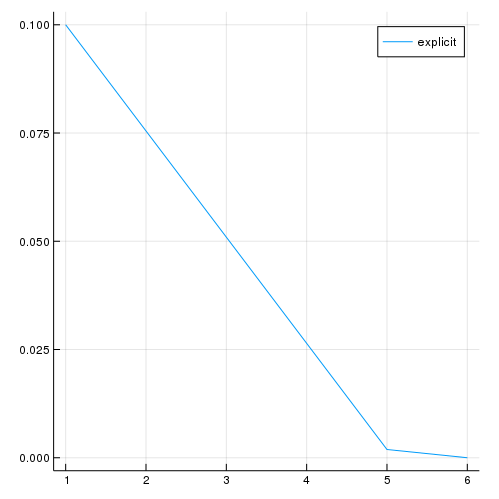

In [12]:
ts = cumsum([Δt for i in 1:N]);
j = 11
plot(traj_exp[j,:],label="explicit")
# plot!(traj_imp[j,:],label="implicit")